# Statistical Analysis on factors influencing Life Expectancy

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from warnings import filterwarnings
filterwarnings('ignore')
import os

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
df.shape

(2938, 22)

In [14]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean',fill_value=None)
df['Life expectancy ']=imputer.fit_transform(df[['Life expectancy ']])
df['Adult Mortality']=imputer.fit_transform(df[['Adult Mortality']])
df['Alcohol']=imputer.fit_transform(df[['Alcohol']])
df['Hepatitis B']=imputer.fit_transform(df[['Hepatitis B']])
df[' BMI ']=imputer.fit_transform(df[[' BMI ']])
df['Polio']=imputer.fit_transform(df[['Polio']])
df['Total expenditure']=imputer.fit_transform(df[['Total expenditure']])
df['Diphtheria ']=imputer.fit_transform(df[['Diphtheria ']])
df['GDP']=imputer.fit_transform(df[['GDP']])
df['Population']=imputer.fit_transform(df[['Population']])
df[' thinness  1-19 years']=imputer.fit_transform(df[[' thinness  1-19 years']])
df[' thinness 5-9 years']=imputer.fit_transform(df[[' thinness 5-9 years']])
df['Income composition of resources']=imputer.fit_transform(df[['Income composition of resources']])
df['Schooling']=imputer.fit_transform(df[['Schooling']])

In [17]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [18]:
df.describe(include= 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,...,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,NaN,4.613841,NaN,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,...,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2004.000000,NaN,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,...,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,NaN,2008.000000,NaN,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,...,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,NaN,2012.000000,NaN,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,...,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000


In [19]:
df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.169623,-0.078861,-0.037415,-0.048168,0.031400,0.089398,-0.082493,0.108327,-0.042937,0.093820,0.081860,0.133853,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471
Life expectancy,0.169623,1.000000,-0.696359,-0.196535,0.391598,0.381791,0.203771,-0.157574,0.559255,-0.222503,0.461574,0.207981,0.475418,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066
Adult Mortality,-0.078861,-0.696359,1.000000,0.078747,-0.190408,-0.242814,-0.138591,0.031174,-0.381449,0.094135,-0.272694,-0.110875,-0.273014,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108
infant deaths,-0.037415,-0.196535,0.078747,1.000000,-0.113812,-0.085612,-0.178783,0.501128,-0.227220,0.996629,-0.170674,-0.126564,-0.175156,0.025231,-0.107109,0.548522,0.465590,0.471228,-0.143663,-0.191757
Alcohol,-0.048168,0.391598,-0.190408,-0.113812,1.000000,0.339634,0.075447,-0.051055,0.318070,-0.110777,0.213744,0.294898,0.215242,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546
percentage expenditure,0.031400,0.381791,-0.242814,-0.085612,0.339634,1.000000,0.011679,-0.056596,0.228537,-0.087852,0.147203,0.173414,0.143570,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105
Hepatitis B,0.089398,0.203771,-0.138591,-0.178783,0.075447,0.011679,1.000000,-0.090317,0.134929,-0.184413,0.408519,0.050084,0.499958,-0.102405,0.062318,-0.109811,-0.105144,-0.108334,0.150992,0.171755
Measles,-0.082493,-0.157574,0.031174,0.501128,-0.051055,-0.056596,-0.090317,1.000000,-0.175925,0.507809,-0.136146,-0.104569,-0.141861,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609
BMI,0.108327,0.559255,-0.381449,-0.227220,0.318070,0.228537,0.134929,-0.175925,1.000000,-0.237586,0.282156,0.231814,0.281059,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105
under-five deaths,-0.042937,-0.222503,0.094135,0.996629,-0.110777,-0.087852,-0.184413,0.507809,-0.237586,1.000000,-0.188703,-0.128269,-0.195651,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111


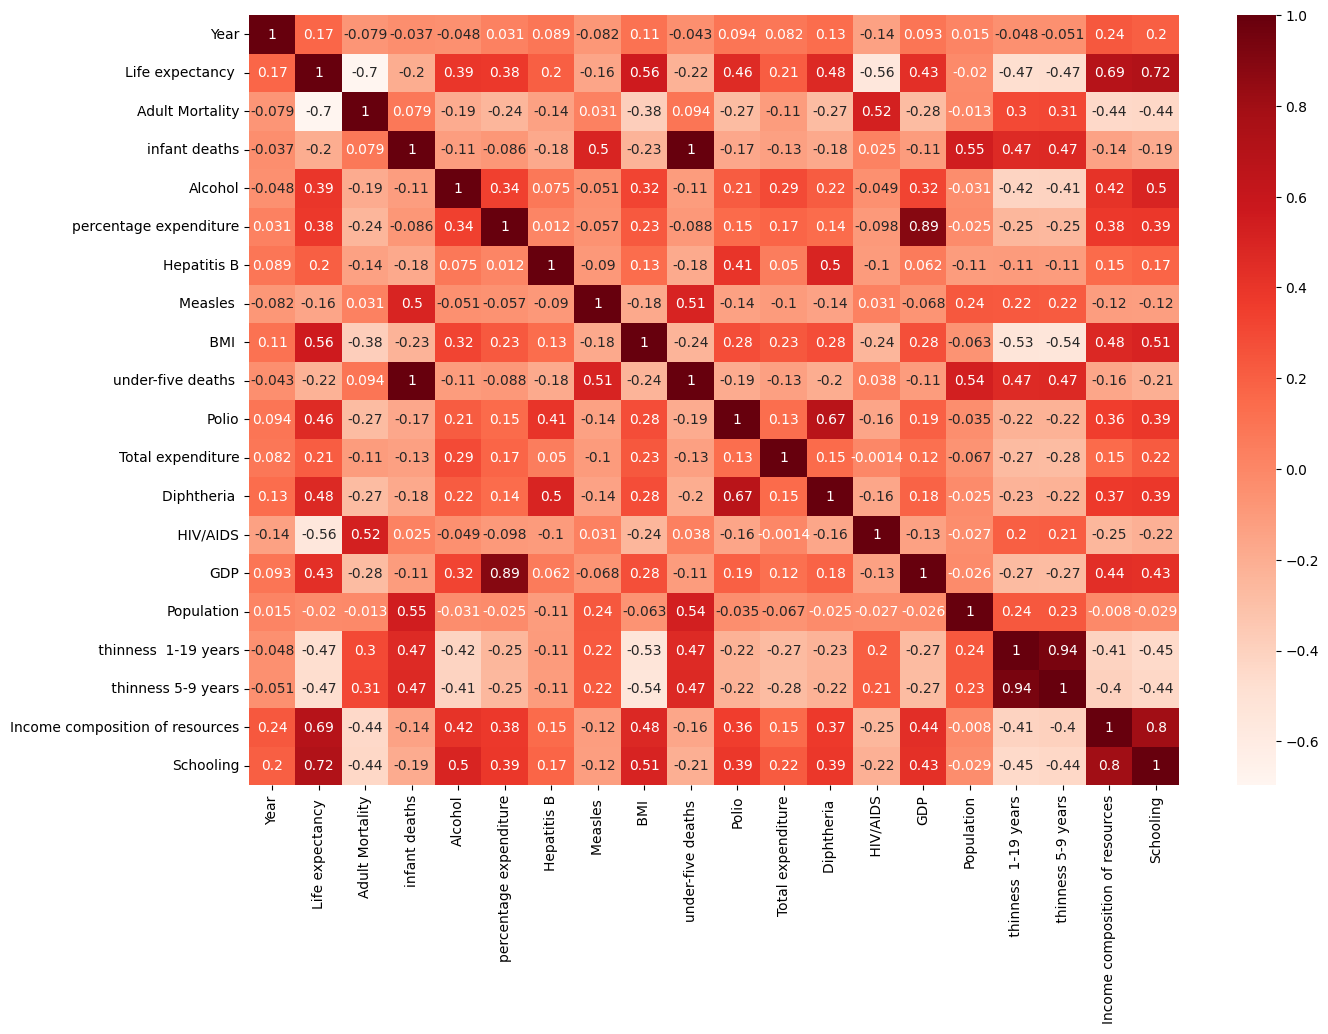

In [20]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True, cmap = "Reds")
plt.show()

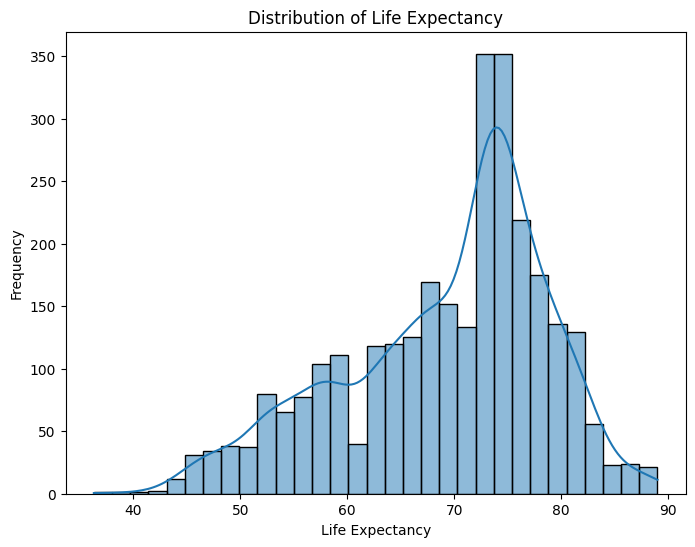

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Life expectancy '], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

In [31]:
print(df.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


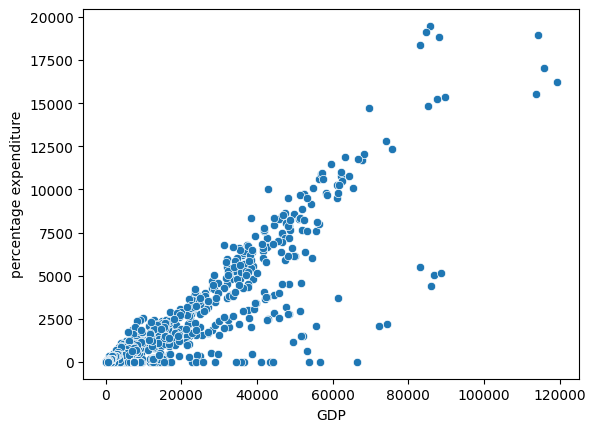

In [32]:
sns.scatterplot(x=df['GDP'],y=df['percentage expenditure']);

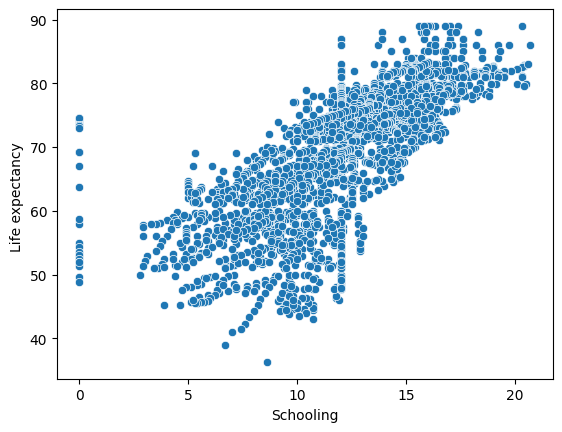

In [33]:
sns.scatterplot(x=df['Schooling'],y=df['Life expectancy ']);

In [34]:
X = df.drop('Life expectancy ', axis = 1)
y = df['Life expectancy ']

In [35]:
y.dtype

dtype('float64')

In [40]:
X.dtypes

Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [41]:
country_dummy = pd.get_dummies(X['Country'])
Status_dummy = pd.get_dummies(X['Status'])

In [47]:
X.drop(['Status', 'Country'], axis = 1, inplace = True)

In [51]:
X = pd.concat([X, country_dummy, Status_dummy], axis = 1)

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 214 entries, Year to Developing
dtypes: float64(15), int64(4), uint8(195)
memory usage: 995.7 KB


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(X_train,y_train)

LinearRegression()

In [59]:
predictions1=lr.predict(X_test)

In [60]:
predictions1[0:10]

array([70.43013997, 75.76814903, 74.15938227, 77.45373897, 51.78352045,
       50.76532923, 66.89406812, 73.88836479, 78.07964398, 58.02619565])

In [61]:
from sklearn.metrics import r2_score, mean_squared_error
r_squared = r2_score(y_test, predictions1)
mse = mean_squared_error(y_test, predictions1)
rmse = mean_squared_error(y_test, predictions1, squared=False)

print(f"R-squared: {r_squared}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.960143222225235
Mean Squared Error: 3.724661945377187
Root Mean Squared Error: 1.9299383268325407


In [66]:
column_names = X.columns
print(column_names)

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen', 'Zambia',
       'Zimbabwe', 'Developed', 'Developing'],
      dtype='object', length=214)


In [67]:
X.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe,Developed,Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
import pickle
pickle.dump(lr, open('Life_Ecpectancy_clf.pkl', 'wb'))

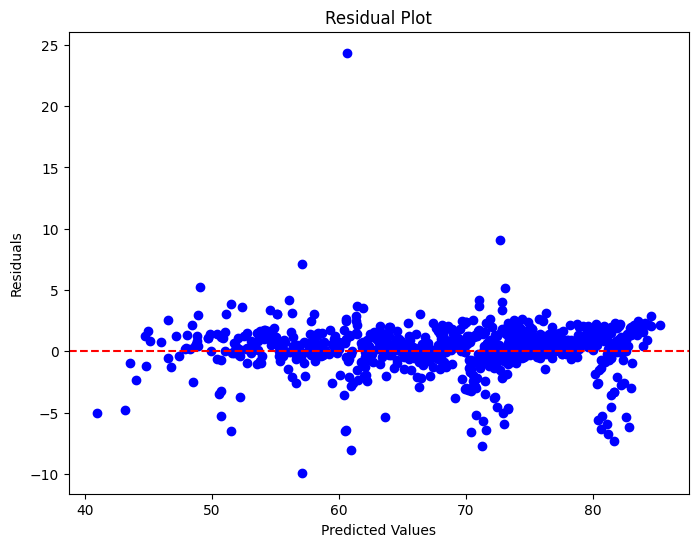

In [69]:
plt.figure(figsize=(8, 6))
plt.scatter(predictions1, predictions1 - y_test, color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
